<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/Taylor_Swift_lyrics_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taylor Swift's lyrics analysis with NLTK processing

##Libraries

In [83]:
%matplotlib inline

import os
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

##Preparing the data

###Creating a list of available csv files

In [84]:
data = []

for filename in os.listdir('/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis'):
    if filename.endswith('csv'):
        print(filename)
        data.append('/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/'+filename)

04-red_deluxe_edition.csv
03-speak_now_deluxe_package.csv
05-1989_deluxe.csv
02-fearless_taylors_version.csv
01-taylor_swift.csv
07-lover.csv
06-reputation.csv
09-evermore_deluxe_version.csv
08-folklore_deluxe_version.csv
Tylor_Swift_lyrics.csv


###Sorting the csv by name

In [85]:
data.sort()
data

['/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/01-taylor_swift.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/02-fearless_taylors_version.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/03-speak_now_deluxe_package.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/04-red_deluxe_edition.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/05-1989_deluxe.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/06-reputation.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/07-lover.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/08-folklore_deluxe_version.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/09-evermore_deluxe_version.csv',
 '/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/

###Concating csv files

In [86]:
df = pd.concat(map(pd.read_csv, data), ignore_index=True)
print(df)

                      album_name       track_title  track_n  \
0                   Taylor Swift        Tim McGraw        1   
1                   Taylor Swift        Tim McGraw        1   
2                   Taylor Swift        Tim McGraw        1   
3                   Taylor Swift        Tim McGraw        1   
4                   Taylor Swift        Tim McGraw        1   
...                          ...               ...      ...   
16711  evermore (deluxe version)  ​it’s time to go       17   
16712  evermore (deluxe version)  ​it’s time to go       17   
16713  evermore (deluxe version)  ​it’s time to go       17   
16714  evermore (deluxe version)  ​it’s time to go       17   
16715  evermore (deluxe version)  ​it’s time to go       17   

                                             lyric  line  
0              He said the way my blue eyes shined     1  
1      Put those Georgia stars to shame that night     2  
2                           I said, "That's a lie"     3  
3      

##Loading the data

In [87]:
df.to_csv('/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/Tylor_Swift_lyrics.csv', index=False)

In [88]:
lyrics = pd.read_csv('/content/drive/MyDrive/Projekty Data Science/Taylor Swift lyrics analysis/Tylor_Swift_lyrics.csv')

In [89]:
lyrics.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


##Inspecting the data

In [90]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   16716 non-null  object
 1   track_title  16716 non-null  object
 2   track_n      16716 non-null  int64 
 3   lyric        16716 non-null  object
 4   line         16716 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 653.1+ KB


###Adding 'release year' column to the dataset

In [91]:
titles = lyrics['album_name'].unique()
print(titles, len(titles))

['Taylor Swift' 'Fearless (Taylor’s Version)' 'Speak Now (Deluxe)'
 'Red (Deluxe Edition)' '1989 (Deluxe)' 'reputation' 'Lover'
 'folklore (deluxe version)' 'evermore (deluxe version)'] 9


In [92]:
def album_release(row):
  if row['album_name'] == titles[0]:
    return '2006'
  elif row['album_name'] == titles[1]:
    return '2008'
  elif row['album_name'] == titles[2]:
    return '2010'
  elif row['album_name'] == titles[3]:
    return '2012'
  elif row['album_name'] == titles[4]: #1989
    return '2014'
  elif row['album_name'] == titles[5]:
    return '2017'
  elif row['album_name'] == titles[6]:
    return '2019'
  elif row['album_name'] == titles[7]:
    return '2020'
  elif row['album_name'] == titles[8]:
    return '2021'
  return 'No date'

lyrics['album_year'] = lyrics.apply(lambda row: album_release(row), axis = 1)

lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [93]:
lyrics.tail()

,album_name,track_title,track_n,lyric,line,album_year
16711,evermore (deluxe version),​it’s time to go,17,"You know, you know, you know, you know",50,2021
16712,evermore (deluxe version),​it’s time to go,17,When it's time to go,51,2021
16713,evermore (deluxe version),​it’s time to go,17,So then you go,52,2021
16714,evermore (deluxe version),​it’s time to go,17,Then you go,53,2021
16715,evermore (deluxe version),​it’s time to go,17,You just go,54,2021


##Cleaning the data

###Lowercasing the lyrics

In [94]:
lyrics['clean_lyric'] = lyrics['lyric'].str.lower()

###Removing punctuation

In [95]:
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [96]:
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats a lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin stuck


###Removing the stopwords

In [97]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [99]:
phrase = 'This is a sentence a the you me example to demonstrate the stopwords removal'
words = word_tokenize(phrase)
stripped_phrase = []
for word in words:
  if word not in stop_words:
    stripped_phrase.append(word)

print(" ".join(stripped_phrase))

This sentence example demonstrate stopwords removal


In [100]:
def remove_stopwords(phrase):
  words = word_tokenize(phrase)
  stripped_phrase = []
  for word in words:
    if word not in stop_words:
      stripped_phrase.append(word)
  new_phrase = (" ".join(stripped_phrase))
  return new_phrase

In [101]:
remove_stopwords('This is a sentence a the you me example to demonstrate the stopwords removal')

'This sentence example demonstrate stopwords removal'

In [102]:
lyrics['clean_lyric'] = lyrics['clean_lyric'].apply(remove_stopwords)
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck


##Finding keyword mentions

###Finding a particular keyword

In [103]:
# lyrics.drop(['rock'], axis=1, inplace = True)

In [104]:
lyrics['midnight'] = lyrics['clean_lyric'].str.contains('midnight')

In [105]:
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined,False
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie,False
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck,False
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False


In [106]:
sum(lyrics['midnight'])

18

###Finding keywords from the lists

In [107]:
night = ['night', 'midnight', 'dawn', 'dusk', 'evening', 'late', 'dark']
day = ['day', 'morning', 'light', 'sun', 'noon', 'bright']
time = ['today', 'tomorrow', 'yesterday']

###Creating regular expression from the lists

In [108]:
night_re = '|'.join(night)
day_re = '|'.join(day)
time_re = '|'.join(time)

###Creating columns for each list

In [109]:
lyrics['night'] = lyrics['clean_lyric'].str.contains(night_re)
lyrics['day'] = lyrics['clean_lyric'].str.contains(day_re)
lyrics['time'] = lyrics['clean_lyric'].str.contains(time_re)

###Counting the occurances of the words

In [110]:
night_count = sum(lyrics['night'])
day_count = sum(lyrics['day'])
time_count = sum(lyrics['time'])

In [111]:
print('Night words:', night_count, 'Day words: ', day_count, 'Time words: ', time_count)

Night words: 468 Day words:  704 Time words:  70


##Changes over the time

###Creating a new dataframe

In [112]:
yearly_mentions = lyrics.groupby('album_year').sum().reset_index()
yearly_mentions = yearly_mentions.iloc[:,[0,4,5,6]]
yearly_mentions

,album_year,night,day,time
0,2006,38,44,6
1,2008,78,130,40
2,2010,60,106,8
3,2012,96,102,14
4,2014,50,82,0
5,2017,50,44,0
6,2019,44,88,0
7,2020,16,34,2
8,2021,36,74,0


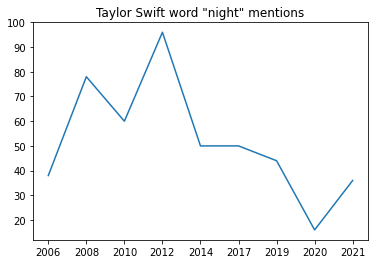

In [113]:
plt.plot(yearly_mentions['album_year'], yearly_mentions['night'])
plt.title('Taylor Swift word "night" mentions')
plt.show()

###Reinstating the album name

In [123]:
keys = lyrics['album_name'].unique()
values = ['2006', '2008', '2010', '2012', '2014', '2017', '2019', '2020', '2021']

year_name = {}
for key in keys:
    for value in values:
        year_name[key] = value
        values.remove(value)
        break

# inv_map = {v: k for k, v in my_map.items()}
year_name = {v: k for k, v in year_name.items()}
year_name

{'2006': 'Taylor Swift',
 '2008': 'Fearless (Taylor’s Version)',
 '2010': 'Speak Now (Deluxe)',
 '2012': 'Red (Deluxe Edition)',
 '2014': '1989 (Deluxe)',
 '2017': 'reputation',
 '2019': 'Lover',
 '2020': 'folklore (deluxe version)',
 '2021': 'evermore (deluxe version)'}

In [124]:
# df['D'] = df['U'].map(dict)
yearly_mentions['album_name'] = yearly_mentions['album_year'].map(year_name)
yearly_mentions

,album_year,night,day,time,album_name
0,2006,38,44,6,Taylor Swift
1,2008,78,130,40,Fearless (Taylor’s Version)
2,2010,60,106,8,Speak Now (Deluxe)
3,2012,96,102,14,Red (Deluxe Edition)
4,2014,50,82,0,1989 (Deluxe)
5,2017,50,44,0,reputation
6,2019,44,88,0,Lover
7,2020,16,34,2,folklore (deluxe version)
8,2021,36,74,0,evermore (deluxe version)


###Finding the album with the most instances of the word

In [126]:
yearly_mentions.sort_values(by = 'night', ascending=False)

,album_year,night,day,time,album_name
3,2012,96,102,14,Red (Deluxe Edition)
1,2008,78,130,40,Fearless (Taylor’s Version)
2,2010,60,106,8,Speak Now (Deluxe)
4,2014,50,82,0,1989 (Deluxe)
5,2017,50,44,0,reputation
6,2019,44,88,0,Lover
0,2006,38,44,6,Taylor Swift
8,2021,36,74,0,evermore (deluxe version)
7,2020,16,34,2,folklore (deluxe version)


In [127]:
yearly_mentions.sort_values(by = 'day', ascending=False)

,album_year,night,day,time,album_name
1,2008,78,130,40,Fearless (Taylor’s Version)
2,2010,60,106,8,Speak Now (Deluxe)
3,2012,96,102,14,Red (Deluxe Edition)
6,2019,44,88,0,Lover
4,2014,50,82,0,1989 (Deluxe)
8,2021,36,74,0,evermore (deluxe version)
0,2006,38,44,6,Taylor Swift
5,2017,50,44,0,reputation
7,2020,16,34,2,folklore (deluxe version)


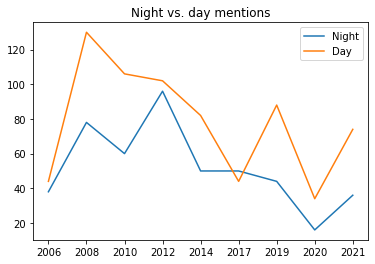

In [131]:
plt.plot(yearly_mentions['album_year'], yearly_mentions['night'], label='Night')
plt.plot(yearly_mentions['album_year'], yearly_mentions['day'], label='Day')
plt.title('Night vs. day mentions')
plt.legend(loc=1)
plt.show()

##Changes over the album

###Creating of a new dataframe with position of the word

In [132]:
lyrics['position'] = lyrics['track_n'] + (lyrics['line']/1000)
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined,False,False,False,False,1.001
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie,False,False,False,False,1.003
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck,False,False,False,False,1.004
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005


In [136]:
positional_mentions = lyrics.groupby(['album_name', 'position']).sum().reset_index()
positional_mentions.head()

,album_name,position,track_n,line,midnight,night,day,time
0,1989 (Deluxe),1.001,2,2,0,0,0,0
1,1989 (Deluxe),1.002,2,4,0,0,0,0
2,1989 (Deluxe),1.003,2,6,0,0,0,0
3,1989 (Deluxe),1.004,2,8,0,0,0,0
4,1989 (Deluxe),1.005,2,10,0,0,0,0


##Sentiment analysis

###Tokenize cleaned lyrics

In [138]:
lyrics['tokenized'] = lyrics['clean_lyric'].str.split(' ')
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,tokenized
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined,False,False,False,False,1.001,"[said, way, blue, eyes, shined]"
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]"
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie,False,False,False,False,1.003,"[said, thats, lie]"
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck,False,False,False,False,1.004,"[boy, chevy, truck]"
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]"


###Stemming
Usuwanie końcówki feksyjnej

In [154]:
# from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(phrase):
  words = word_tokenize(phrase)
  stemmed_words = []
  for word in words:
    stemmed_words.append(stemmer.stem(word))
  new_phrase = (" ".join(stemmed_words)).split() #Utworzenie listy słów dzięki metodzie split()
  return new_phrase

In [163]:
phrase = 'Taylor is driving the sports car and I am enjoying the sunset'
stemming(phrase)

['taylor',
 'is',
 'drive',
 'the',
 'sport',
 'car',
 'and',
 'i',
 'am',
 'enjoy',
 'the',
 'sunset']

In [164]:
lyrics['tokenized_stem'] = lyrics['clean_lyric'].apply(stemming)
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,tokenized,tokenized_stem
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined,False,False,False,False,1.001,"[said, way, blue, eyes, shined]","[said, way, blue, eye, shine]"
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]","[put, georgia, star, shame, night]"
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie,False,False,False,False,1.003,"[said, thats, lie]","[said, that, lie]"
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck,False,False,False,False,1.004,"[boy, chevy, truck]","[boy, chevi, truck]"
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]","[tendenc, gettin, stuck]"


###Finding the most frequent words

In [165]:
word_list = [word for lista in lyrics['tokenized_stem'] for word in lista] #Dla każdego słowa w tokenized lyrics
word_list[:20]

['said',
 'way',
 'blue',
 'eye',
 'shine',
 'put',
 'georgia',
 'star',
 'shame',
 'night',
 'said',
 'that',
 'lie',
 'boy',
 'chevi',
 'truck',
 'tendenc',
 'gettin',
 'stuck',
 'back']

In [162]:
word_frequency = collections.Counter(word_list)
word_frequency = sorted(word_frequency.items(), key = lambda x: x[1], reverse = True)
word_frequency[:20]

[('know', 1020),
 ('im', 1002),
 ('like', 998),
 ('oh', 822),
 ('dont', 812),
 ('love', 716),
 ('never', 706),
 ('your', 686),
 ('time', 582),
 ('na', 552),
 ('back', 534),
 ('caus', 506),
 ('come', 460),
 ('say', 456),
 ('want', 442),
 ('got', 442),
 ('think', 434),
 ('one', 418),
 ('see', 404),
 ('babi', 392)]

###Sentiment

In [166]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [167]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('Taylor Swift is a great singer')

{'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.7096}

In [168]:
lyrics['polarity'] = lyrics['clean_lyric'].apply(lambda x: sia.polarity_scores(x))
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,tokenized,tokenized_stem,polarity
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined,False,False,False,False,1.001,"[said, way, blue, eyes, shined]","[said, way, blue, eye, shine]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]","[put, georgia, star, shame, night]","{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp..."
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie,False,False,False,False,1.003,"[said, thats, lie]","[said, that, lie]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck,False,False,False,False,1.004,"[boy, chevy, truck]","[boy, chevi, truck]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]","[tendenc, gettin, stuck]","{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound..."


###Splitting one column into 
Utworzenie pd.Series z jednej kolumny

In [169]:
lyrics[['neg', 'neu', 'pos', 'comp']] = lyrics['polarity'].apply(pd.Series)
lyrics.drop('polarity', axis = 1)

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,tokenized,tokenized_stem,neg,neu,pos,comp
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,said way blue eyes shined,False,False,False,False,1.001,"[said, way, blue, eyes, shined]","[said, way, blue, eye, shine]",0.000,1.000,0.0,0.0000
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]","[put, georgia, star, shame, night]",0.437,0.563,0.0,-0.4767
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,said thats lie,False,False,False,False,1.003,"[said, thats, lie]","[said, that, lie]",0.000,1.000,0.0,0.0000
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,boy chevy truck,False,False,False,False,1.004,"[boy, chevy, truck]","[boy, chevi, truck]",0.000,1.000,0.0,0.0000
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]","[tendenc, gettin, stuck]",0.500,0.500,0.0,-0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,evermore (deluxe version),​it’s time to go,17,"You know, you know, you know, you know",50,2021,know know know know,False,False,False,False,17.050,"[know, know, know, know]","[know, know, know, know]",0.000,1.000,0.0,0.0000
16712,evermore (deluxe version),​it’s time to go,17,When it's time to go,51,2021,time go,False,False,False,False,17.051,"[time, go]","[time, go]",0.000,1.000,0.0,0.0000
16713,evermore (deluxe version),​it’s time to go,17,So then you go,52,2021,go,False,False,False,False,17.052,[go],[go],0.000,1.000,0.0,0.0000
16714,evermore (deluxe version),​it’s time to go,17,Then you go,53,2021,go,False,False,False,False,17.053,[go],[go],0.000,1.000,0.0,0.0000


##Corpus sentiment analysis

###Joining rows of tokenized words 

In [226]:
sent = lyrics.iloc[:,[0, 1, 5, 12]]
sent = sent.groupby(['album_name', 'track_title', 'album_year'])['tokenized'].apply(list).reset_index()
sent

,album_name,track_title,album_year,tokenized
0,1989 (Deluxe),All You Had to Do Was Stay,2014,"[[hey, hey, hey], [hey, hey, hey], [hey, hey, ..."
1,1989 (Deluxe),Bad Blood,2014,"[[cause, baby, weve, got, bad, blood], [know, ..."
2,1989 (Deluxe),Blank Space,2014,"[[nice, meet], [could, show, incredible, thing..."
3,1989 (Deluxe),Clean,2014,"[[drought, worst, ohoh, ohoh], [flowers, wed, ..."
4,1989 (Deluxe),How You Get the Girl,2014,"[[oh, oh, oh], [oh, oh, oh], [ohoh, ohoh], [st..."
...,...,...,...,...
158,reputation,King of My Heart,2017,"[[im, perfectly, fine, live], [made, mind, im,..."
159,reputation,Look What You Made Me Do,2017,"[[dont, like, little, games], [dont, like, til..."
160,reputation,New Year’s Day,2017,"[[theres, glitter, floor, party], [girls, carr..."
161,reputation,So It Goes...,2017,"[[see, dark], [eyes, magician], [eyes, us], [m..."


In [228]:
import itertools

def flatten(l):
  return list(itertools.chain(*l))
  # return [item for sublist in l for item in sublist]

def to_str(xs):
  x = ' '.join(str(x) for x in xs)
  return x

sent['tokenized'] = sent['tokenized'].apply(flatten).apply(to_str)
sent

,album_name,track_title,album_year,tokenized
0,1989 (Deluxe),All You Had to Do Was Stay,2014,hey hey hey hey hey hey hey hey hey hey hey he...
1,1989 (Deluxe),Bad Blood,2014,cause baby weve got bad blood know used mad lo...
2,1989 (Deluxe),Blank Space,2014,nice meet could show incredible things magic m...
3,1989 (Deluxe),Clean,2014,drought worst ohoh ohoh flowers wed grown toge...
4,1989 (Deluxe),How You Get the Girl,2014,oh oh oh oh oh oh ohoh ohoh stand like ghost s...
...,...,...,...,...
158,reputation,King of My Heart,2017,im perfectly fine live made mind im better bei...
159,reputation,Look What You Made Me Do,2017,dont like little games dont like tilted stage ...
160,reputation,New Year’s Day,2017,theres glitter floor party girls carrying shoe...
161,reputation,So It Goes...,2017,see dark eyes magician eyes us make everyone d...


In [230]:
sent['polarity'] = sent['tokenized'].apply(lambda x: sia.polarity_scores(x))
sent[['neg', 'neu', 'pos', 'comp']] = sent['polarity'].apply(pd.Series)
sent.drop('polarity', axis = 1)
sent.head()

,album_name,track_title,album_year,tokenized,polarity,neg,neu,pos,comp
0,1989 (Deluxe),All You Had to Do Was Stay,2014,hey hey hey hey hey hey hey hey hey hey hey he...,"{'neg': 0.012, 'neu': 0.663, 'pos': 0.325, 'co...",0.012,0.663,0.325,0.9987
1,1989 (Deluxe),Bad Blood,2014,cause baby weve got bad blood know used mad lo...,"{'neg': 0.304, 'neu': 0.57, 'pos': 0.126, 'com...",0.304,0.570,0.126,-0.9990
2,1989 (Deluxe),Blank Space,2014,nice meet could show incredible things magic m...,"{'neg': 0.237, 'neu': 0.537, 'pos': 0.226, 'co...",0.237,0.537,0.226,-0.3156
3,1989 (Deluxe),Clean,2014,drought worst ohoh ohoh flowers wed grown toge...,"{'neg': 0.104, 'neu': 0.724, 'pos': 0.173, 'co...",0.104,0.724,0.173,0.9766
4,1989 (Deluxe),How You Get the Girl,2014,oh oh oh oh oh oh ohoh ohoh stand like ghost s...,"{'neg': 0.157, 'neu': 0.712, 'pos': 0.131, 'co...",0.157,0.712,0.131,-0.9719


In [231]:
sentiment_a = sent.groupby(['album_name', 'track_title', 'album_year']).sum().reset_index()
sentiment_a

pos = round(sum(sentiment_a['pos']), 1)
neg = round(sum(sentiment_a['neg']), 1)
compound = round(sum(sentiment_a['comp']), 1)

print(
    'Positive: ', pos,
    'Negative: ', neg,
    'Compound: ', compound
)

Positive:  36.4 Negative:  24.3 Compound:  68.9


In [232]:
sentiment_a.sort_values(by = 'pos', ascending=False)

,album_name,track_title,album_year,neg,neu,pos,comp
71,Red (Deluxe Edition),Sad Beautiful Tragic,2012,0.156,0.373,0.471,0.9995
50,Lover,It’s Nice to Have a Friend,2019,0.033,0.508,0.458,0.9988
37,Fearless (Taylor’s Version),We Were Happy (Taylor’s Version) [From the Vault],2008,0.032,0.535,0.434,0.9993
51,Lover,London Boy,2019,0.011,0.568,0.421,0.9998
8,1989 (Deluxe),Out of the Woods,2014,0.027,0.573,0.400,0.9997
...,...,...,...,...,...,...,...
17,Fearless (Taylor’s Version),Bye Bye Baby (Taylor’s Version) [From the Vault],2008,0.209,0.715,0.076,-0.9942
111,Taylor Swift,The Outside,2006,0.158,0.771,0.071,-0.9617
137,folklore (deluxe version),this is me trying,2020,0.218,0.712,0.070,-0.9875
120,evermore (deluxe version),​evermore,2021,0.333,0.614,0.053,-0.9984


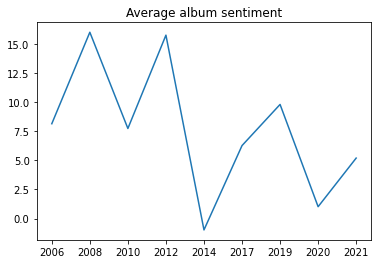

In [233]:
yearly_sent = sentiment_a.groupby('album_year').sum().reset_index()
plt.plot(yearly_sent['album_year'], yearly_sent['comp'])
plt.title('Average album sentiment')
plt.show()